## Exploratory Data Analysis for Demand Data

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_initial = pd.read_pickle('./DemandDataFile', compression='infer')
df_region = pd.read_pickle('./RegionDataFile', compression='infer')
df_initial = pd.merge(df_initial, df_region, how='inner', right_on=['CITY_NAME'], left_on=['CITY'])
df_initial = df_initial.drop(['CITY_NAME'], axis=1)
df_initial = df_initial[~df_initial['PRODUCT_NAME'].str.contains("Small Flyers|Large Flyers|Meter Bubble Wrap|Bundle of 50 Boxes", na=False)]
print(df_initial.shape)

In [ ]:
df_initial.rename(columns = {'ORDER_DATE':'DATE'},inplace = True)

In [ ]:
df_initial[df_initial.CITY == 'Karachi']

In [ ]:
totalDays = 180 
MinHistoryDays = int(totalDays * 0.02)

temp = df_initial.groupby(['SKU'])['DATE'].count().to_frame('Count').reset_index()
temp = temp[temp.Count >= MinHistoryDays]

df_initial = pd.merge(df_initial, temp, how='inner')

df_initial.Voucher[df_initial.Voucher > 0] = True
df_initial.Voucher[df_initial.Voucher != True] = False

In [ ]:
df_initial['CatConcat'] = df_initial[['CATEGORY_LEVEL_1', 'CATEGORY_LEVEL_2','CATEGORY_LEVEL_3','CATEGORY_LEVEL_4']].apply(lambda x: ' | '.join(x.str.strip()), axis=1)

In [ ]:
temp = df_initial.groupby(by=['REGION_NAME'], as_index=False)['Quantity'].sum()
temp.sort_values('Quantity',ascending=False, inplace = True)

regions = temp['REGION_NAME'][:7]
values = temp['Quantity'][:7]
my_circle=plt.Circle( (0,0), 0.75, color='white')
# Give color names
plt.pie(values, labels=regions, colors=['red','green','blue','violet','yellow','brown','orange'],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%.2f')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Unique SKUs Demand % Region-Wise', fontsize= 16)
plt.show()


In [324]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

locale.format("%d", 1255000, grouping=True)


print('Total Valid Orders count in 6 Month (Dec 17 - May 18) : ' , locale.format('%d', df_initial.COD_ORDER_NR.nunique(), grouping=True)  )
temp = df_initial[df_initial.Voucher == True]
print('Total Valid Orders count with Voucher Used in 6 Month (Dec 17 - May 18) : ', temp.COD_ORDER_NR.nunique())
print('Total Sum of Valid Items in 6 Month (Dec 17 - May 18) : ', locale.format('%d', df_initial.Quantity.sum(), grouping=True))
print('Total MV of items demanded in 6 Month (Dec 17 - May 18) : ', locale.format('%d', df_initial.MV.sum(), grouping=True))
print('Unique SKUs in 6 Month (Dec 17 - May 18) : ', locale.format('%d', df_initial.SKU.nunique(), grouping=True))
print('Unique "Category Level 1" in 6 Month (Dec 17 - May 18) : ', df_initial.CATEGORY_LEVEL_1.nunique())
print('Unique "Category Level 2" in 6 Month (Dec 17 - May 18) : ', df_initial.CATEGORY_LEVEL_2.nunique())
print('Average Order MV in 6 Month (Dec 17 - May 18) : ', (df_initial.MV.sum() / df_initial.COD_ORDER_NR.nunique()).round(decimals = 1))
print('Average Basket size in 6 Month (Dec 17 - May 18) : ', (df_initial.Quantity.sum() / df_initial.COD_ORDER_NR.nunique()).round(decimals = 1))


Total Valid Orders count in 6 Month (Dec 17 - May 18) :  1,611,355
Total Valid Orders count with Voucher Used in 6 Month (Dec 17 - May 18) :  115
Total Sum of Valid Items in 6 Month (Dec 17 - May 18) :  5,863,192
Total MV of items demanded in 6 Month (Dec 17 - May 18) :  7,022,646,463
Unique SKUs in 6 Month (Dec 17 - May 18) :  380,672
Unique "Category Level 1" in 6 Month (Dec 17 - May 18) :  23
Unique "Category Level 2" in 6 Month (Dec 17 - May 18) :  106
Average Order MV in 6 Month (Dec 17 - May 18) :  4358.2
Average Basket size in 6 Month (Dec 17 - May 18) :  3.6


Text(0.5,1,'Gender-wise Orders Count')

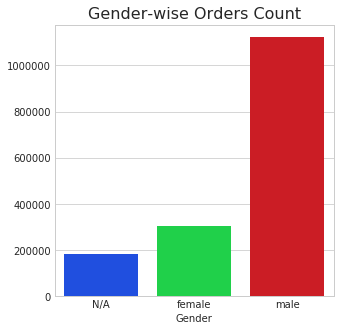

In [369]:
f, ax = plt.subplots(figsize=(5,5))
sns.set_style("whitegrid")
sns.barplot(x=df_initial.groupby(['Gender'])['COD_ORDER_NR'].nunique().index,
                 y=df_initial.groupby(['Gender'])['COD_ORDER_NR'].nunique().values)

plt.title('Gender-wise Orders Count', fontsize=16)

In [ ]:
df_initial['PRICE_MEDIAN'] = df_initial.groupby('SKU')['UNIT_PRICE'].transform('median')

In [ ]:
df_initial['WEEKDAY'] = df_initial['DATE'].apply(lambda x:calendar.day_name[x.weekday()])
df_initial['MONTH'] = df_initial['DATE'].apply(lambda x:calendar.month_abbr[x.month])

In [ ]:
temp = df_initial.groupby(['Gender','Voucher'])['COD_ORDER_NR'].nunique().reset_index()
sns.set_style('whitegrid')

g = sns.factorplot(x='Gender', y='COD_ORDER_NR', hue='Voucher', data=temp, kind='bar')
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 1.2, box.height * 1.4]) # resize position
for p in g.ax.patches:
    g.ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Gender-wise Orders Count with Voucher used', fontsize=16)


In [ ]:
sns.set_style("whitegrid")
temp = df_initial.groupby(['Gender','COD_ORDER_NR','CUSTOMER_DEVICE'])['MV'].sum().reset_index()
f, ax = plt.subplots(figsize=(7,7))
sns.set_palette("bright")
#ax = sns.boxplot(x="Voucher", y="Quantity", data=df_initial)
ax = sns.stripplot(size=3,dodge=True,x="Gender", y="MV", hue="CUSTOMER_DEVICE", data=temp[temp.MV <= 900000],jitter=True)
plt.title('Gender Level Expenditure Breakdown by Device', fontsize=16)

In [ ]:
print('Device Usage Breakdown by Gender Male\n-------------------------------------- \n' , pd.DataFrame(temp[temp.Gender == 'male'].CUSTOMER_DEVICE.value_counts()),'\n\n')
print('Device Usage Breakdown by Gender Female\n---------------------------------------- \n' , pd.DataFrame(temp[temp.Gender == 'female'].CUSTOMER_DEVICE.value_counts()),'\n\n')
print('Device Usage Breakdown by Gender N/A\n-------------------------------------- \n' , pd.DataFrame(temp[temp.Gender == 'N/A'].CUSTOMER_DEVICE.value_counts()),'\n\n')

In [ ]:
temp = df_initial[df_initial.Voucher == True].groupby(['CATEGORY_LEVEL_1'])['Quantity'].sum().reset_index()

f, ax = plt.subplots(figsize=(9,5))

temp.sort_values('Quantity',ascending=False, inplace = True)

ax = sns.barplot(x='CATEGORY_LEVEL_1', y='Quantity', data=temp[:10])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Top 10 Level 1 Catagories with most Voucher Used', fontsize=14)
plt.xticks(rotation=90)

In [ ]:
f, ax = plt.subplots(figsize=(9,5))

temp.sort_values('Quantity',ascending=False, inplace = True)

ax = sns.barplot(x='CATEGORY_LEVEL_1', y='Quantity', data=temp[-10:])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Level 1 Catagories with Least Voucher Used', fontsize=14)
plt.xticks(rotation=90)

In [ ]:
temp = df_initial[df_initial.Voucher == True].groupby(['BRAND_NAME'])['Quantity'].sum().reset_index()

f, ax = plt.subplots(figsize=(7,4))

temp.sort_values('Quantity',ascending=False, inplace = True)

sns.barplot(x='BRAND_NAME', y='Quantity', data=temp[:10])
plt.title('Top 10 Brands with most Voucher Used', fontsize=14)
plt.xticks(rotation=90)

In [ ]:
temp = df_initial[df_initial.CITY == 'Karachi'][['DATE','BRAND_NAME','Quantity']].groupby(by=['DATE','BRAND_NAME'])['Quantity'].sum().reset_index()
temp = temp[temp.BRAND_NAME.isin(['Samsung','Infinix','Huawei'])]

fig, ax = plt.subplots(figsize=(12, 7))
# graph = pd.Series(temp.iloc[:0,-1])
# graph.plot(ax=ax,use_index=False,legend = True)
temp = temp.iloc[:,[0,-1,1]]

ax.plot(temp[temp.BRAND_NAME == 'Infinix']['DATE'],temp[temp.BRAND_NAME == 'Infinix']['Quantity'],label="Infinix")
ax.plot(temp[temp.BRAND_NAME == 'Samsung']['DATE'],temp[temp.BRAND_NAME == 'Samsung']['Quantity'],label="Samsung")
ax.plot(temp[temp.BRAND_NAME == 'Huawei']['DATE'],temp[temp.BRAND_NAME == 'Huawei']['Quantity'],label="Huawei")
#ax.plot(temp[temp.BRAND_NAME == 'Samsung']['DATE'],temp[temp.BRAND_NAME == 'Samsung']['Quantity'],label="Samsung")
ax.set(ylim=(1, 300))
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.88), shadow=True, ncol=1)


In [ ]:
def CreateLinePlots(dataFrame,Cat1,Cat2,SelectColumnName,ValueList,yUpperLimit):
    if ValueList!= None:
         dataFrame = dataFrame[dataFrame[SelectColumnName].isin(ValueList)]
    else:
        ValueList = dataFrame[(dataFrame.CATEGORY_LEVEL_1 == Cat1)
                            & (dataFrame.CATEGORY_LEVEL_2 == Cat2)][SelectColumnName].value_counts()[:3].index.tolist()
        print(ValueList)
        dataFrame = dataFrame[(dataFrame.CATEGORY_LEVEL_1 == Cat1)
                            & (dataFrame.CATEGORY_LEVEL_2 == Cat2)
                            & (dataFrame[SelectColumnName].isin(ValueList))]
    
    dataFrame = dataFrame[['DATE',SelectColumnName,'Quantity']].groupby(by=['DATE',SelectColumnName])['Quantity'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(12, 7))
    dataFrame = dataFrame.iloc[:,[0,-1,1]]
    for item in ValueList:
        ax.plot(dataFrame[dataFrame[SelectColumnName] == item]['DATE'],dataFrame[dataFrame[SelectColumnName] == item]['Quantity'],label=item)
        
    ax.set(ylim=(1, yUpperLimit))
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)


        #temp = dataFrame.groupby(by=['DATE'])['Quantity'].sum().reset_index()
    plt.ylabel('Quantity Demand in a Day')
    plt.title('Historical Demand Trend Comparision between Brands', fontsize=16)
    return 0


In [ ]:
CreateLinePlots(df_initial[df_initial.CITY == 'Lahore'],'Phones & Tablets','Mobile Phones','BRAND_NAME',['Samsung','Infinix','Huawei'],300)

In [ ]:
df_initial['WEEKDAY'] = df_initial['DATE'].apply(lambda x:calendar.day_name[x.weekday()])
df_initial['MONTH'] = df_initial['DATE'].apply(lambda x:calendar.month_abbr[x.month])


#### TOP 5 Most Contributing Categories MV wise / month 

,MONTH,CATEGORY_LEVEL_1,MV,Total,% Contribution to total MV
3,Jan,"Phones & Tablets | Computing & Gaming | TVs, Audio & Cameras | Appliances | Beauty & Health",9.500319e+08,1.202427e+09,79.009521
2,Feb,"Phones & Tablets | TVs, Audio & Cameras | Computing & Gaming | Appliances | Beauty & Health",1.075074e+09,1.303678e+09,82.464664
4,Mar,"Phones & Tablets | Appliances | Computing & Gaming | TVs, Audio & Cameras | Women's Fashion",1.181712e+09,1.551668e+09,76.157536
0,Apr,"Phones & Tablets | Appliances | Computing & Gaming | TVs, Audio & Cameras | Baby, Toys & Kids",6.693197e+08,9.643001e+08,69.409898
5,May,"Phones & Tablets | Appliances | Computing & Gaming | TVs, Audio & Cameras | Baby, Toys & Kids",8.054408e+08,1.147781e+09,70.173713
1,Dec,"Phones & Tablets | TVs, Audio & Cameras | Appliances | Computing & Gaming | Men's Fashion",6.057222e+08,8.527912e+08,71.028198


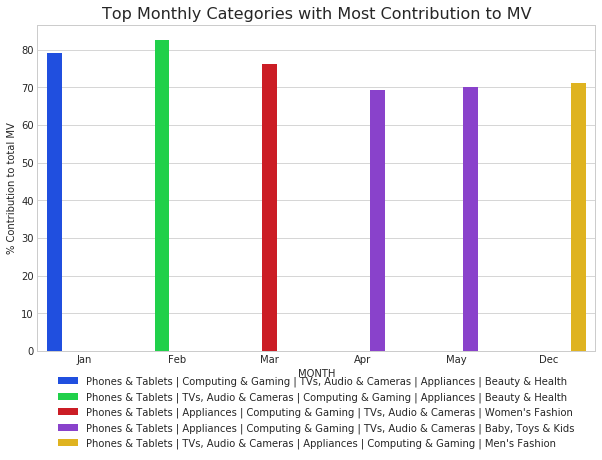

In [341]:
colName = 'MV'
temp = df_initial.groupby(by=['MONTH','CATEGORY_LEVEL_1'], as_index=False)[colName].sum()
temp = temp.loc[temp.groupby('MONTH')[colName].nlargest(5).reset_index()['level_1']]

temp = temp.groupby(['MONTH'],as_index=False).agg(lambda x : x.sum() if ((x.dtype=='int64') | ((x.dtype=='float64'))) else ' | '.join(x))
temp['Total'] = df_initial.groupby(by=['MONTH'], as_index=False)[colName].sum()[colName]
temp['% Contribution to total MV'] = (temp[colName] / temp['Total'])*100

temp["MONTH"] = pd.to_datetime(temp.MONTH, format='%b', errors='coerce').dt.month
temp.sort_values('MONTH',ascending=True, inplace = True)

temp.MONTH = temp.MONTH.apply(lambda x: datetime(2018, int(x), 1).strftime("%b"))
#temp.MONTH = datetime(2012, int(temp.MONTH), 1).formated_month.strftime("%b")
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('whitegrid')
g = sns.barplot(x='MONTH', y='% Contribution to total MV', hue='CATEGORY_LEVEL_1', data=temp)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=1)

plt.title('Top Monthly Categories with Most Contribution to ' + colName, fontsize=16)

temp

In [ ]:
def generateMonthlyTopCatagoriesPlt(data,title):
    data.sort_values('Quantity',ascending=False, inplace = True)
    sns.set_style('whitegrid')
    g = sns.factorplot(x='MONTH', y='Quantity', hue='CatConcat', data=data, kind='bar')
    box = g.ax.get_position()
    g.ax.set_position([box.x0 , box.y0, box.width * 1.2, box.height * 1.0]) # resize position
    #g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05),fancybox=True, shadow=True, ncol=5)
    g.despine(left=False)
    #g.fig.get_axes()[0].legend(loc='upper right')
    #plt.legend(loc='upper center')
    plt.title(title, fontsize=16)

    
for x in months:
    data = temp[temp.MONTH == x]
    if data.shape[0] > 0:
        generateMonthlyTopCatagoriesPlt(data,'Top Demanded Catagories for Month : ' + x)
       

In [437]:
temp = df_initial.groupby(by=['CATEGORY_LEVEL_1'], as_index=False)['Quantity'].sum()

#exclude Packaging Materials
temp = temp[~temp['CATEGORY_LEVEL_1'].isin(['Packaging Materials'])]

temp['Unique SKU'] = df_initial.groupby(by=['CATEGORY_LEVEL_1'], as_index=False)['SKU'].nunique()
temp['Ratio'] =  (temp['Unique SKU'] / temp['Quantity']) * 100
#temp = temp.loc[temp.groupby('MONTH')['Ratio'].nsmallest(10).reset_index()['level_1']]
temp.sort_values('Ratio',ascending=True, inplace = True)
temp



,CATEGORY_LEVEL_1,Quantity,Unique SKU,Ratio
6,Charity & Donation,4476,62,1.385165
10,Grocer's Shop,711957,12864,1.806851
17,Phones & Tablets,2502347,61186,2.445144
21,Vouchers & Services,9870,263,2.664640
2,"Baby, Toys & Kids",439619,34696,7.892289
4,Beauty & Health,642259,55994,8.718290
14,Men's Fashion,371809,40553,10.906944
19,Sports & Travel,157657,17887,11.345516
3,Bachat Bazaar,183,22,12.021858
20,"TVs, Audio & Cameras",75088,9524,12.683784


,CATEGORY_LEVEL_1,Quantity,Unique SKU,Ratio
17,Phones & Tablets,2502347,61186,2.445144
10,Grocer's Shop,711957,12864,1.806851
4,Beauty & Health,642259,55994,8.718290
2,"Baby, Toys & Kids",439619,34696,7.892289
14,Men's Fashion,371809,40553,10.906944
22,Women's Fashion,328583,54402,16.556547
11,Home & Living,276119,40236,14.571978
19,Sports & Travel,157657,17887,11.345516
7,Computing & Gaming,107805,15168,14.069848
20,"TVs, Audio & Cameras",75088,9524,12.683784


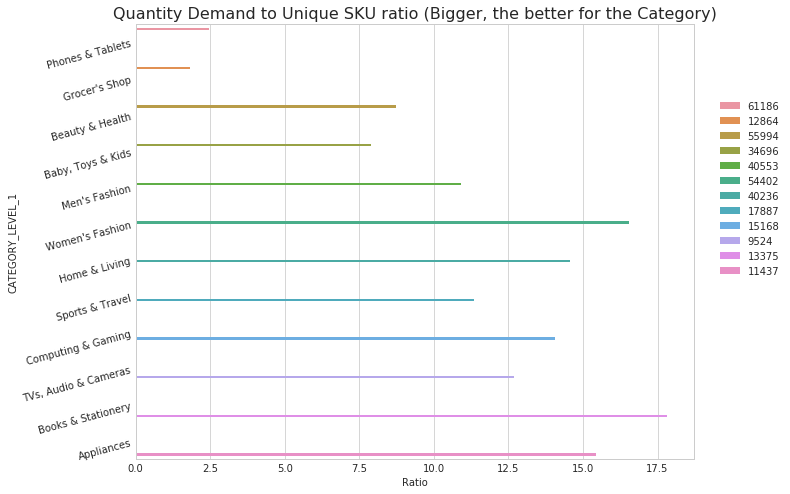

In [435]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(y='CATEGORY_LEVEL_1', x='Ratio', hue='Unique SKU', hue_order=temp[:12]['Unique SKU'], data=temp[:12])
plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.4),fancybox=False, shadow=False, ncol=1)

rects = ax.patches

# for rect, label in zip(rects, temp[:12]['Unique SKU'].values):
#     height = rect.get_height()
#     if np.isnan(height):
#         height = 0
        
#     ax.text(rect.get_x() , 5, label,
#             ha='center', va='bottom')
    
plt.title('Quantity Demand to Unique SKU ratio (Bigger, the better for the Category)', fontsize=16)
plt.yticks(rotation=15)

#df_initial[(df_initial.CATEGORY_LEVEL_1 == 'Appliances') & (df_initial.MONTH == 'Apr')]['SKU'].nunique()

In [384]:
temp[:12]['Unique SKU'].values

array([61186, 12864, 55994, 34696, 40553, 54402, 40236, 17887, 15168,
        9524, 13375, 11437])

In [ ]:
f, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=temp['MONTH'].values,
                 y=temp['Assortment% Demand'].values)
plt.title('Month Wise Assortment Demand Percentage', fontsize=14)
plt.xticks(rotation=90)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:
import os
from functools import partial
import spacy as spacy #load spacy
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import os
import string
from spacy.lang.en import English

nlp = spacy.load('en')
stops = stopwords.words("english")
punctuations = string.punctuation

parser = English()

def normalize(comment, lowercase, remove_stopwords):
        #comment = df_initial[df_initial.SKU == key]['PRODUCT_NAME'].unique()[0]
        key = comment.split('-*-')[0]
        comment = comment.split('-*-')[1]
        if lowercase:
            comment = comment.lower()
        comment = nlp(comment)
        lemmatized = list()
        for word in comment:
            lemma = word.lemma_.strip()
            if lemma:
                if not remove_stopwords or (len(lemma) > 2 and remove_stopwords and lemma not in stops and lemma not in punctuations):
                    lemmatized.append(lemma)
        return (key," ".join(lemmatized))

#mapfunc = partial(normalize, lowercase=True,remove_stopwords=True)

def dask_tokenizer(df):
    df_initial['PRODUCT_STEMMED'] = list(map(mapfunc, df_initial['PRODUCT_NAME']))
    return df_initial

In [ ]:
if os.path.exists('./ProcessedDemandDataFile'):
    cleanedProductNames = pd.read_pickle('./ProcessedDemandDataFile', compression='infer')
    cleanedProductNames.columns = ['SKU','PRODUCT_STEMMED']
    df_initial = pd.merge(df_initial, cleanedProductNames, how='inner')
    print('File Found')
else:
    df_initial['PRODUCT_STEMMED'] = 'Null'
    print('File Not Found..Creating')
    mapfunc = partial(normalize, lowercase=True,remove_stopwords=True)
    #df_initial[['SKU','PRODUCT_NAME']].apply(lambda x: '--'.join(x.str.strip()), axis=1)
    %time temp = df_initial['SKU'].map(str)+'-*-'+df_initial['PRODUCT_NAME'].map(str)
    %time cleanedProductNames = list(temp.drop_duplicates().apply(normalize, lowercase=True, remove_stopwords=True))
    pd.DataFrame(cleanedProductNames).to_pickle('./ProcessedDemandDataFile',compression='infer', protocol=4)

In [ ]:
def generateWordCloud(text,maxWords,title):
    wordcloud = WordCloud(max_font_size=45,max_words=maxWords,background_color="black").generate(text)
    plt.subplots(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title,fontsize=18)
    plt.axis("off")
    plt.show()

In [ ]:
from wordcloud import WordCloud
for x in months:
    temp = df_initial[df_initial.MONTH == x]
    if temp.shape[0] > 0:
        allText = ', '.join(temp.PRODUCT_STEMMED)
        generateWordCloud(allText,200,'Overview for ' + x)

In [ ]:
from matplotlib.ticker import FuncFormatter
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

fig, ax = plt.subplots(figsize=(12, 5))
#bins = np.arange(0,60,5) , use bins=bins in hist function below for smaller values
df_initial['PRICE_MEDIAN'].hist(ax=ax, bottom=0.1)

formatter = FuncFormatter(log_10_product)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(range(0, int(df_initial['PRICE_MEDIAN'].max()), int(85000)), fontsize=14)
plt.xlabel('Product Demand by Price Range', fontsize=18)
plt.ylabel('Frequency of Demand', fontsize=16)
plt.xticks(rotation=70)


In [ ]:
# df_initial[df_initial.PRICE_MEDIAN >= 800000]

In [ ]:
#temp = df_initial[['MONTH','CATEGORY_LEVEL_1']]
#temp = df_initial.groupby(by=['MONTH','CATEGORY_LEVEL_1'], as_index=False)['DATE'].count()
temp = df_initial[df_initial.CATEGORY_LEVEL_1 == 'Phones & Tablets'].groupby(by=['MONTH','PRODUCT_NAME'], as_index=False)['DATE'].count()
months = ["Dec","Jan", "Feb", "Mar", "Apr", "May"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
temp[temp.DATE > 400].shape
#temp[:10]

In [ ]:
columnName = 'DATE'
temp = df_initial.groupby(by=['MONTH','CATEGORY_LEVEL_3'], as_index=False)[columnName].count()
months = ["Dec","Jan", "Feb", "Mar", "Apr", "May"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
temp.rename(columns = {columnName:'Quantity Demanded'},inplace = True)
g = sns.factorplot(x="MONTH", y="Quantity Demanded", hue='CATEGORY_LEVEL_3',
                    data=temp[(temp['Quantity Demanded'] >= 100) &
                              ((temp['CATEGORY_LEVEL_3'] == 'Winter Clothing') |
                               (temp['CATEGORY_LEVEL_3'] == 'Western Clothing') |
                               (temp['CATEGORY_LEVEL_3'] == 'Pakistani & Traditional Clothing'))],
                    kind="point", size=10, aspect=1)
box = g.ax.get_position()
g.ax.set_position([box.x0, box.y0, box.width * 1.5, box.height * 0.8]) # resize position
plt.title('Clothing category demand comparision Month wise', fontsize=18)

In [ ]:
temp = df_initial[(df_initial.CATEGORY_LEVEL_1 == 'Phones & Tablets') 
           & (df_initial.CATEGORY_LEVEL_2 == 'Mobile Phones')
           & (df_initial.CATEGORY_LEVEL_3 == 'Smartphones')].groupby(by=['MONTH','PRODUCT_NAME'], as_index=False)['DATE'].count()
months = ["Dec","Jan", "Feb", "Mar", "Apr", "May"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
prod_list = temp.PRODUCT_NAME.unique()
temp.rename(columns = {'DATE':'Quantity Demanded'},inplace = True)
g = sns.factorplot(x="MONTH", y="Quantity Demanded", hue='PRODUCT_NAME',
                    data=temp[temp.PRODUCT_NAME.isin(prod_list[30:40])],
                    kind="point", size=10, aspect=1)
# resize figure box to -> put the legend out of the figure
box = g.ax.get_position() # get position of figure
g.ax.set_position([box.x0, box.y0, box.width * 1.5, box.height * 0.8]) # resize position
plt.title('Trend for Smart Phones randomly selected', fontsize=18)


In [ ]:
 df_initial[(df_initial.CATEGORY_LEVEL_1 == 'Phones & Tablets') 
           & (df_initial.CATEGORY_LEVEL_2 == 'Mobile Phones')
           & (df_initial.CATEGORY_LEVEL_3 == 'Smartphones')]['PRODUCT_NAME'].unique()[:10]

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
#pd.DataFrame(temp.PRODUCT_NAME.unique())
#temp
